In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\\abhis\\Downloads\\Linear Regression Sample Data sets\\wc-at.csv')

In [6]:
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [7]:
df.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [8]:
df.columns

Index(['Waist', 'AT'], dtype='object')

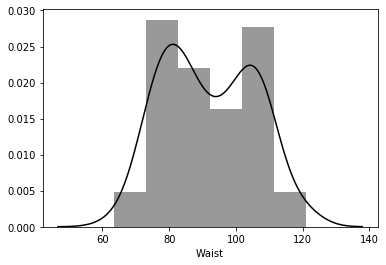

In [9]:
sns.distplot(df['Waist'],color='black')

Text(0, 0.5, 'AT')

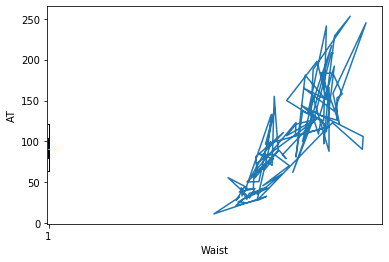

In [11]:
plt.boxplot(df['Waist'])
plt.plot(df['Waist'],df['AT'])
plt.xlabel('Waist')
plt.ylabel('AT')

Text(0, 0.5, 'AT')

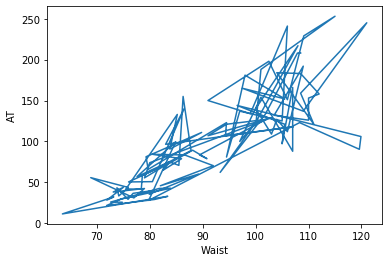

In [10]:
plt.plot(df['Waist'],df['AT'])
plt.xlabel('Waist')
plt.ylabel('AT')

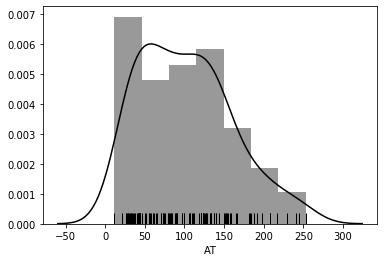

In [11]:
sns.distplot(df['AT'],color='black',rug=True,)

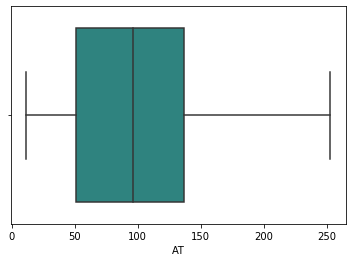

In [12]:
sns.boxplot(df['AT'],palette ='viridis',orient='h')

In [13]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


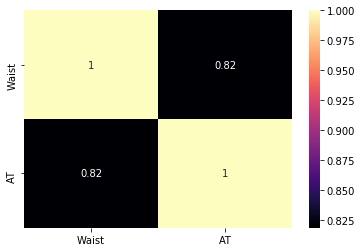

In [14]:
sns.heatmap(df.corr(),cmap='magma',annot=True)

In [15]:
df['AT'].corr(df['Waist'])  #correlation value between X and Y

0.818557812895853

In [16]:
np.corrcoef(df['AT'],df['Waist'])

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [17]:
# Preparing linear regression model

In [18]:
import statsmodels.formula.api as smf

In [19]:
model = smf.ols('AT~Waist',data=df).fit()

In [20]:
type(model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [21]:
model.params   #Getting the Parameters

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           1.62e-27
Time:                        10:40:07   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.conf_int(0.05) # 95% confidence level

,0,1
Intercept,-259.190053,-172.772923
Waist,2.993689,3.924030


In [24]:
prediction = model.predict(df)

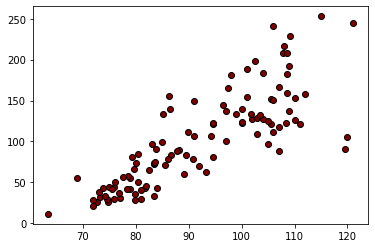

In [25]:
plt.scatter(x=df['Waist'],y=df['AT'],c='maroon',edgecolors='black')

Text(0, 0.5, 'Tissue')

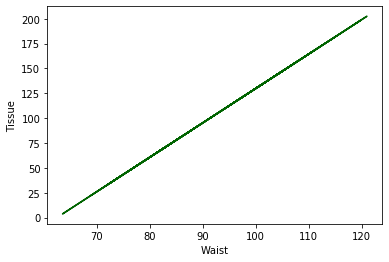

In [26]:
plt.plot(df['Waist'],prediction,color='darkgreen')
plt.xlabel('Waist')
plt.ylabel('Tissue')

In [27]:
prediction.corr(df['AT'])

0.818557812895853

In [28]:
# Transforming variables for accuracy [LOG TRANSFORMATION]

In [29]:
model2 = smf.ols('AT~np.log(Waist)',data=df).fit()

In [30]:
type(model2)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [31]:
model2.params

Intercept       -1328.341989
np.log(Waist)     317.135564
dtype: float64

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           6.80e-28
Time:                        10:40:08   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model.conf_int(0.01)  # 99% confidence level

,0,1
Intercept,-273.143516,-158.819460
Waist,2.843470,4.074248


In [34]:
prediction2 = model2.predict(df)

In [35]:
prediction2.corr(df['AT'])

0.8217781862645356

In [36]:
prediction2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
          ...    
104    132.438233
105    110.127880
106    137.778929
107    156.234559
108    157.993171
Length: 109, dtype: float64

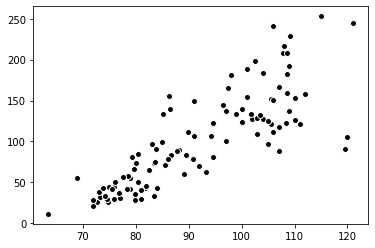

In [37]:
plt.scatter(x=df['Waist'],y=df['AT'],color='black',edgecolors='white')

Text(0, 0.5, 'Tissue')

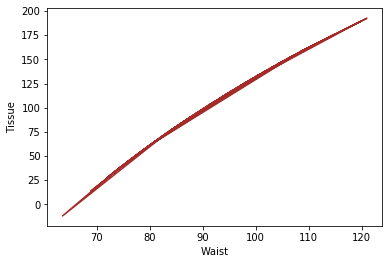

In [38]:
plt.plot(df['Waist'],prediction2,color='brown')
plt.xlabel('Waist')
plt.ylabel('Tissue')

In [39]:
# EXPONENTIAL TRANSFORMATION

In [40]:
model3 = smf.ols('np.log(AT)~Waist',data=df).fit()

In [41]:
type(model3)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [42]:
model3.params

Intercept    0.741021
Waist        0.040252
dtype: float64

In [43]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           2.68e-30
Time:                        10:40:09   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model3.conf_int(0.01)  #99% Confidence interval

,0,1
Intercept,0.130939,1.351102
Waist,0.033684,0.046820


In [45]:
prediction3 = model3.predict(df)

In [46]:
prediction3

0      3.749889
1      3.663346
2      4.033669
3      4.120211
4      3.745864
         ...   
104    4.770288
105    4.496571
106    4.838717
107    5.084257
108    5.108408
Length: 109, dtype: float64

In [47]:
predict_3 = np.exp(prediction3)

In [48]:
predict_3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

In [49]:
predict_3.corr(df['AT'])

0.7633804583650532

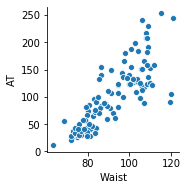

In [50]:
sns.pairplot(data=df,x_vars='Waist',y_vars='AT')

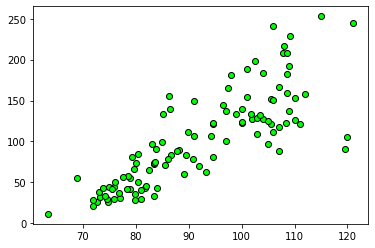

In [51]:
plt.scatter(df['Waist'],df['AT'],color='lime',edgecolors='black')

Text(0, 0.5, 'Tissue')

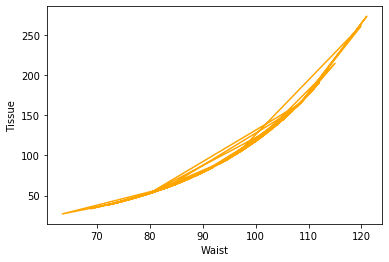

In [52]:
plt.plot(df['Waist'],predict_3,color='orange')
plt.xlabel('Waist')
plt.ylabel('Tissue')

In [53]:
a = predict_3 -df['AT']

In [54]:
a

0      16.796361
1      13.101601
2      13.867684
3      18.772246
4      12.505566
         ...    
104    -6.046819
105    27.509020
106    -6.692819
107   -46.540128
108   -42.593167
Length: 109, dtype: float64

In [55]:
# Getting residuals of the entire data set by considering model3 as it has the highest root mean squared value

In [56]:
t_resid = model3.resid_pearson

In [57]:
t_resid

array([-1.42426841, -1.16036536, -0.79857367, -1.03053611, -0.99183029,
       -1.57770329, -1.77782943, -1.7063649 , -2.43678253, -0.60898882,
       -0.82630708,  0.05965107, -0.11441073, -0.48719133, -1.15546702,
        1.44239166, -0.05388192, -0.61457662,  0.16338349, -1.18519137,
       -0.66413371, -0.85671265, -1.10408983, -0.66788034, -0.61366891,
       -0.53854217,  0.559278  ,  1.28377825,  0.46848176,  0.30798929,
        0.51662718,  0.58049434, -0.07722426,  0.24329581, -0.00731172,
        0.71101855,  0.76180321, -0.07709724,  0.97229834,  0.26937281,
        0.53880043,  0.34505495, -0.14698466,  2.03681962,  1.38280011,
       -0.79731502,  0.38539598,  0.75747349,  0.67811133,  1.31762395,
        1.00267879,  1.11566466,  2.03975207, -0.12692781, -0.4705888 ,
        0.44867784,  0.60008028,  2.34805258,  0.21771996,  0.59055788,
        0.50813615,  1.25820146, -1.76365553, -0.81659309, -2.97779536,
       -2.56121918,  0.97601914, -0.5436722 , -1.10931613,  0.18

Text(0, 0.5, 'standardized residual')

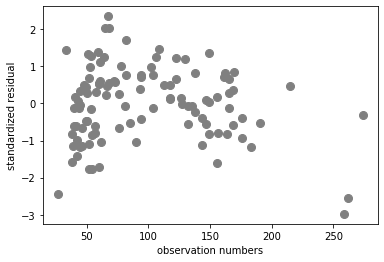

In [58]:
plt.plot(predict_3,t_resid,'o',color='grey',lw=1,markersize='8',)
plt.xlabel('observation numbers')
plt.ylabel('standardized residual')

In [59]:
# Predicted vs actual values

Text(0, 0.5, 'Actual')

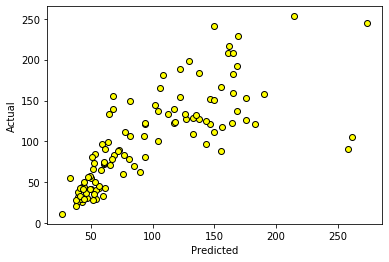

In [60]:
plt.scatter(predict_3,df['AT'],color='yellow',edgecolors='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [61]:
# Quadratic model

In [62]:
df['Waist_sq'] = df['Waist']*df['Waist']

In [63]:
df.head()

,Waist,AT,Waist_sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225


In [64]:
model4 = smf.ols('AT~Waist+Waist_sq',data=df).fit()

In [65]:
model4.params

Intercept   -466.288707
Waist          8.970879
Waist_sq      -0.029700
dtype: float64

In [66]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           8.37e-27
Time:                        10:40:17   Log-Likelihood:                -533.67
No. Observations:                 109   AIC:                             1073.
Df Residuals:                     106   BIC:                             1081.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -466.2887    156.964     -2.971      0.004    -777.485    -155.092
Waist          8.9709      3.431      2.614      0.010       2.168      15.774
Waist_sq      -0.0297      0.018     -1.610      0.110      -0.066       0.007
==============================================================================
Omnibus:                        3.682   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.054
Skew:                           0.338   Prob(JB):                        0.217
Kurtosis:                       3.465   Cond. No.                     4.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
prediction4 =  model4.predict(df)

In [68]:
prediction4

0       38.332186
1       28.453926
2       68.797327
3       77.500643
4       37.878820
          ...    
104    134.098939
105    112.156423
106    139.155399
107    155.886026
108    157.412266
Length: 109, dtype: float64

In [69]:
model4.conf_int(0.05)

,0,1
Intercept,-777.484955,-155.092458
Waist,2.167743,15.774014
Waist_sq,-0.066273,0.006872


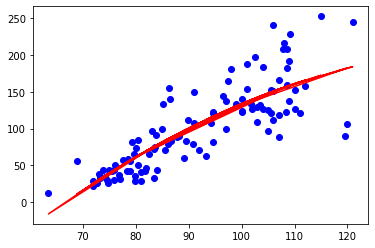

In [70]:
plt.scatter(df['Waist'],df['AT'],c="b")
plt.plot(df['Waist'],prediction4,"r")

Text(0, 0.5, 'Standardized Residual')

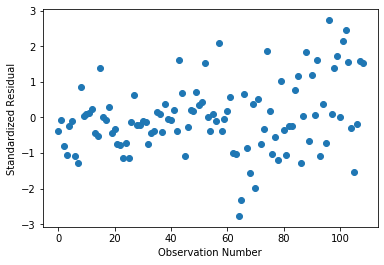

In [71]:
plt.scatter(np.arange(109),model4.resid_pearson)
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

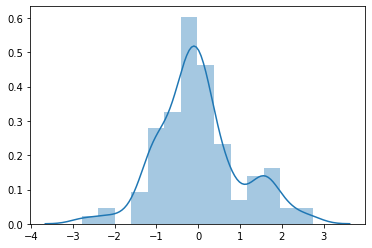

In [72]:
sns.distplot(model4.resid_pearson)

In [73]:
# Regression Evaluation Metrics

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [96]:
rmse1 = np.sqrt(np.mean((prediction-df['AT'])**2))

In [97]:
rmse

38.52900175807141